In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [ ]:
train.info()

In [ ]:
test.info()

In [19]:
print(train.shape, test.shape)

(1000, 81) (460, 80)


In [ ]:
display(train.isna().sum())
display(train.isna().sum())

<Axes: >

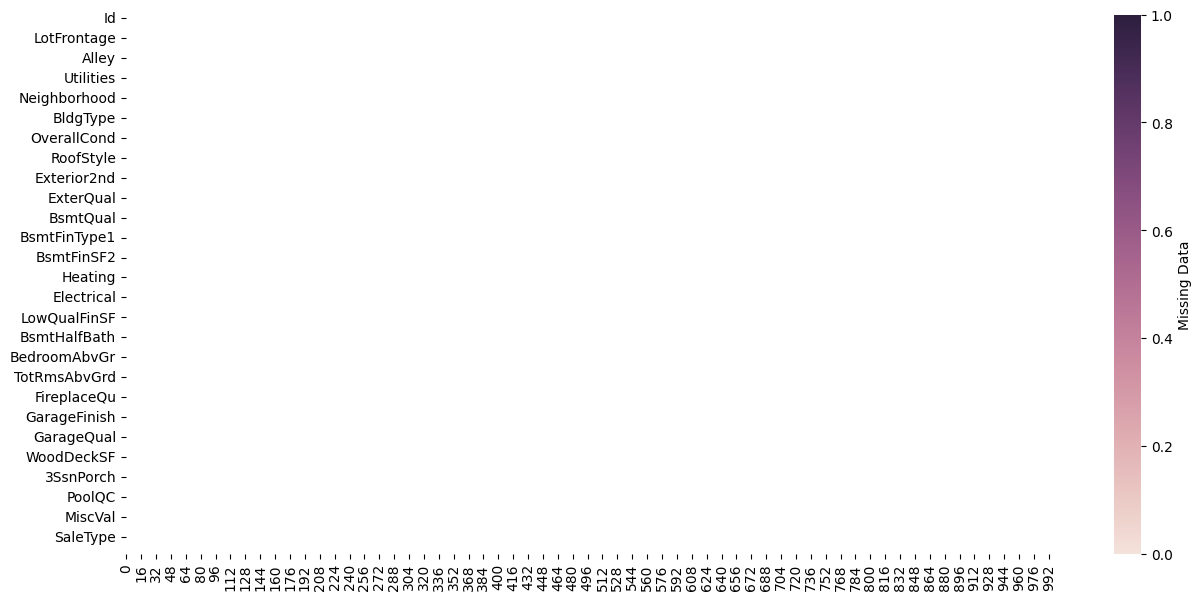

In [41]:
plt.figure(figsize = (15, 7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap = cmap, cbar_kws = {'label':'Missing Data'}, linewidth = 0.5)

In [43]:
display(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
plt.figure(figsize=(15,15))
corr = train.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [ ]:
categ = train.loc[:,train.dtypes == 'object'].columns
categ

In [56]:
for i in categ:
    LE = LabelEncoder()
    train[i] = LE.fit_transform(train[i])
    test[i] = LE.fit_transform(test[i])

In [68]:
train = train.fillna(train.mean(axis=0), axis=0)
test = test.fillna(test.mean(axis=0), axis=0)

In [ ]:
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

In [72]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.023333333333333334
CPU times: user 1.69 s, sys: 31.1 ms, total: 1.72 s
Wall time: 1.73 s


In [90]:
print(mean_squared_error(y_test, y_pred))

1560980704.13


In [81]:
y_pred_test = clf.predict(test)

y_pred_test

array([116000, 120500, 189000, 185000, 316600, 175000, 150000, 117500,
       189000, 107000, 140000, 133000, 133900, 117500, 155000, 189000,
       189000, 316600, 148000, 189000, 133900, 189000, 167000, 189000,
       190000, 129500, 135000, 189000, 117500, 133900, 107000, 176000,
       290000, 189000, 133900, 122000, 189000, 189000, 135000, 133000,
       167000, 135000, 316600, 187000, 430000,  76500, 240000, 162000,
       174000, 116000, 189000, 189000, 139000, 133900, 189000, 190000,
       189000, 122000, 189000, 167000, 277500, 149000, 177000, 100000,
       187000, 189000, 189000, 185000, 185000,  95000, 117500, 155000,
       133900, 133900, 189000, 133900, 187000, 135500, 133900, 133900,
       275000, 157900, 189000, 167000, 185000, 137500, 117500, 189000,
       160200, 385000, 135000, 179400, 187000, 176000, 157900, 189000,
       167000, 179200, 133900, 175000,  39300, 117500, 117500, 139000,
       178740, 248900, 228000, 189000, 189000, 240000, 185000, 176000,
      

In [ ]:
y_pred_test = pd.DataFrame(data = y_pred_test, columns=['SalePrice'])

y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv('solution.csv', index = False)